In [338]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [339]:
sourcedata = '../SourceData/DataScienceSalary_Scrubbed.csv'
df = pd.read_csv(sourcedata).drop(columns=['Unnamed: 0'])
print(df.head(2))

   YEAR   EXPERIENCE EMPLOYMENT              TITLE LOCATION COMPANYSIZE  \
0  2023  Entry Level  Full time  Applied Scientist       US       Large   
1  2023  Entry Level  Full time  Applied Scientist       US       Large   

   SALARY  
0  213660  
1  130760  


In [340]:
#df=df.sample(n=100)
#df_.groupby('EXPERIENCE').count()

In [341]:
df =df[['EXPERIENCE','EMPLOYMENT','COMPANYSIZE','SALARY']]
df.dtypes

EXPERIENCE     object
EMPLOYMENT     object
COMPANYSIZE    object
SALARY          int64
dtype: object

In [343]:
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['EXPERIENCE', 'EMPLOYMENT', 'COMPANYSIZE']

In [344]:
from sklearn.preprocessing import OneHotEncoder
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_encoded 



array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [345]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [346]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded

,EXPERIENCE,EMPLOYMENT,COMPANYSIZE,SALARY,EXPERIENCE_Entry Level,EXPERIENCE_Experienced,EXPERIENCE_Mid Level,EXPERIENCE_Senior,EMPLOYMENT_Contractor,EMPLOYMENT_Freelancer,EMPLOYMENT_Full time,EMPLOYMENT_Part time,COMPANYSIZE_Large,COMPANYSIZE_Medium,COMPANYSIZE_Small
0,Entry Level,Full time,Large,213660,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Entry Level,Full time,Large,130760,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Entry Level,Full time,Large,100000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Entry Level,Full time,Large,30000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Entry Level,Full time,Large,204620,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,Senior,Full time,Medium,148261,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2406,Senior,Full time,Small,91237,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2407,Senior,Full time,Medium,190200,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2408,Senior,Full time,Small,45618,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [347]:
# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
      SALARY  EXPERIENCE_Entry Level  EXPERIENCE_Experienced  \
0     213660                     1.0                     0.0   
1     130760                     1.0                     0.0   
2     100000                     1.0                     0.0   
3      30000                     1.0                     0.0   
4     204620                     1.0                     0.0   
...      ...                     ...                     ...   
2405  148261                     0.0                     0.0   
2406   91237                     0.0                     0.0   
2407  190200                     0.0                     0.0   
2408   45618                     0.0                     0.0   
2409  412000                     0.0                     0.0   

      EXPERIENCE_Mid Level  EXPERIENCE_Senior  EMPLOYMENT_Contractor  \
0                      0.0                0.0                    0.0   
1                      0.0                0.0                 

In [348]:
X=df_encoded.iloc[:,1:]
y=df_encoded.iloc[:,0]
X

,EXPERIENCE_Entry Level,EXPERIENCE_Experienced,EXPERIENCE_Mid Level,EXPERIENCE_Senior,EMPLOYMENT_Contractor,EMPLOYMENT_Freelancer,EMPLOYMENT_Full time,EMPLOYMENT_Part time,COMPANYSIZE_Large,COMPANYSIZE_Medium,COMPANYSIZE_Small
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2405,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2406,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2407,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2408,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [349]:
y

0       213660
1       130760
2       100000
3        30000
4       204620
         ...  
2405    148261
2406     91237
2407    190200
2408     45618
2409    412000
Name: SALARY, Length: 2410, dtype: int64

In [350]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [351]:
'''from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
encoded_X_train = ohe.fit_transform(X_train)
encoded_input =ohe.transform(X_test)
#df1_X = pd.DataFrame(data_X.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
'''

"from sklearn.preprocessing import OneHotEncoder\nohe=OneHotEncoder(handle_unknown='ignore')\nencoded_X_train = ohe.fit_transform(X_train)\nencoded_input =ohe.transform(X_test)\n#df1_X = pd.DataFrame(data_X.toarray(), columns=ohe.get_feature_names_out(), dtype=int)\n"

In [352]:
'''#Check Model Accuracy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score
import numpy as np
score_r2 =r2_score(y_train,reg.predict(X_train))
score_m = mean_absolute_error(y_test,y_pred)
score_meansquare=mean_squared_error(y_test,y_pred)
score_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2",score_r2)
print("Mean Abs",score_m)
print("Mean Square",score_meansquare)
print("Root Mean Square",score_rootmeansquared)'''

'#Check Model Accuracy\nfrom sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score\nimport numpy as np\nscore_r2 =r2_score(y_train,reg.predict(X_train))\nscore_m = mean_absolute_error(y_test,y_pred)\nscore_meansquare=mean_squared_error(y_test,y_pred)\nscore_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))\nprint("R2",score_r2)\nprint("Mean Abs",score_m)\nprint("Mean Square",score_meansquare)\nprint("Root Mean Square",score_rootmeansquared)'

In [353]:
#Encoding Categorical Data - Independent data
#Encoding Independent variables --> OneHotEncoder
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
#encone = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

encone = OneHotEncoder(handle_unknown='ignore')
encone.fit(X)'''
'''ordinal_mapping =[
    {
        "col":"EXPERIENCE","mapping":{"Entry Level":1,"Experienced	":2,"Mid Level":3,"Senior":4}
    }
]
X_transform =ColumnTransformer(
    [
        (
            'ordinal',OrdinalEncoder(ColumnTransformer=['EXPERIENCE'],mapping=ordinal_mapping),['EXPERIENCE']
        )
    ],remainder='passthrough'
)'''
#X_transform=enc.fit_transform(X).toarray()
#X=enc.transform(X).toarray()
#X_transform=np.array(X_transform)
#y=np.array(y)
'''
encone.categories_
X_transform=encone.transform(X).toarray()
print(X_transform)'''

'\nencone.categories_\nX_transform=encone.transform(X).toarray()\nprint(X_transform)'

STEP #1: Determining the degree of the polynomial
y = ß0 + ß1x + ß2x2 --> Degree 2 

In [357]:
from sklearn.preprocessing  import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly
#reg = RandomForestRegressor(max_depth=2, random_state=0)
#reg = LinearRegression()
#reg.fit(X_train,y_train)

PolynomialFeatures(include_bias=False)

STEP #2: Creating the new features

X.reshape(-1, 1)-->transforms  numpy array x from a 1D array to a 2D array 

In [360]:
poly_features = poly.fit_transform(X)
#poly_features.shape

STEP #3: Creating the polynomial regression model

In [361]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [362]:
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([ 47872.,  47872.,  47872., ..., 159168., 115328., 144384.])

In [372]:
X.iloc[:,1].shape

(2410,)

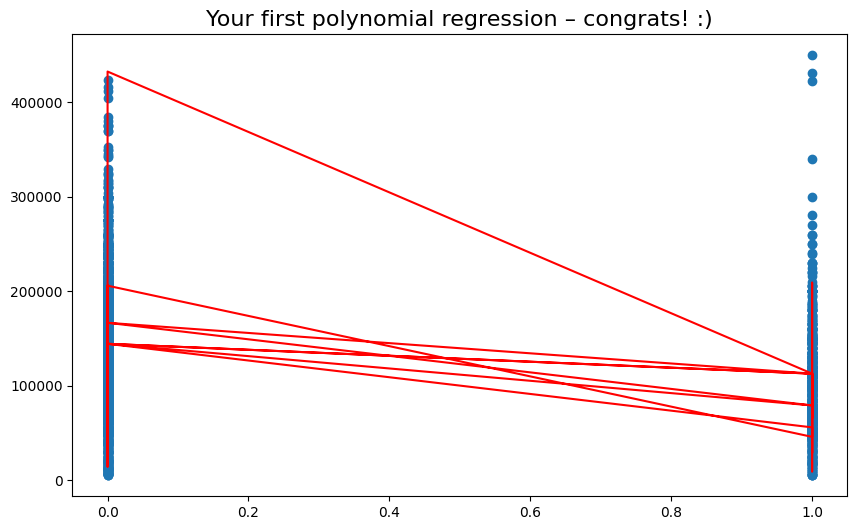

In [374]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(X.iloc[:,2], y)
plt.plot(X.iloc[:,2], y_predicted, c="red")
plt.show()

In [ ]:
'''y_pred.shape
(y_test.reshape(-1,1)).shape'''

'y_pred.shape\n(y_test.reshape(-1,1)).shape'

In [ ]:
reg.score(X_train,y_train)

0.11639448546196496

In [ ]:
#Check Model Accuracy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score
import numpy as np
score_r2 =r2_score(y_test,y_pred)
score_m = mean_absolute_error(y_test,y_pred)
score_meansquare=mean_squared_error(y_test,y_pred)
score_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2",score_r2)
print("Mean Abs",score_m)
print("Mean Square",score_meansquare)
print("Root Mean Square",score_rootmeansquared)

R2 0.16187276172224163
Mean Abs 48709.580377347724
Mean Square 3894298384.5954266
Root Mean Square 62404.31383001841


In [ ]:
X_train_=X_train.reshape(1,-1)
X_train_.shape

(1, 1928)

In [ ]:
y_train_=y_train.reshape(1,-1)
y_train_.shape

(1, 1928)

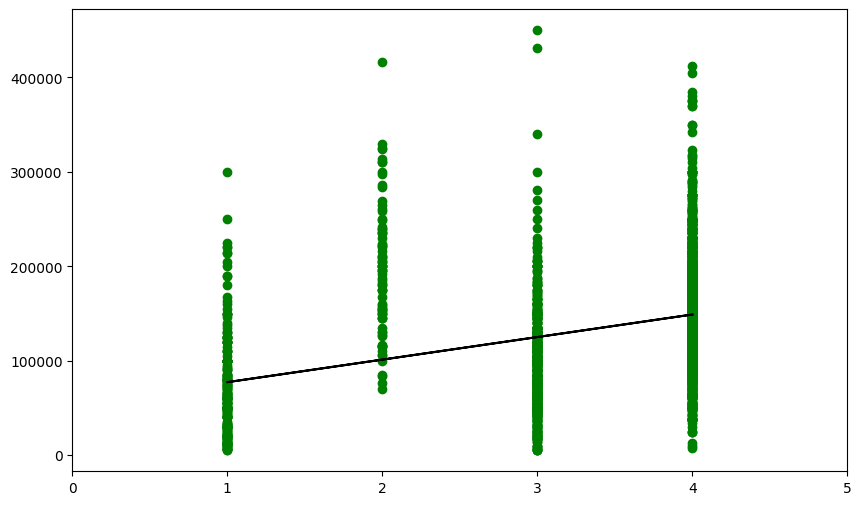

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train,color='g')
plt.plot(X_train,reg.predict(X_train),color='k')
#plt.xticks(range(len(X_test)),df['X_test'],rotation=45,ha='right')
plt.xlim(0,5)
plt.show()